<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data - https://openflights.org/data.html

In [1]:
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
!pip install cartopy

import cartopy.crs as ccrs

import pandas as pd

airports = pd.read_csv("/content/airports.csv", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])

print(airports)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
         id                                         name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         K

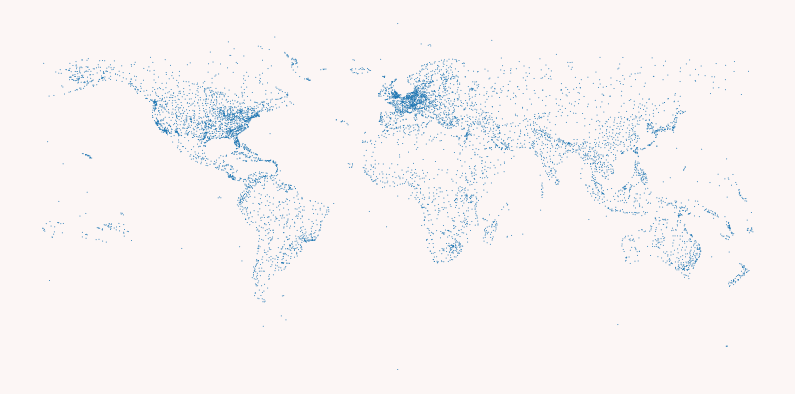

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

In [3]:
routes = pd.read_csv("/content/routes.csv", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

print(routes)

      airline     id source_airport source_airport_id destination_airport  \
0          2B    410            AER              2965                 KZN   
1          2B    410            ASF              2966                 KZN   
2          2B    410            ASF              2966                 MRV   
3          2B    410            CEK              2968                 KZN   
4          2B    410            CEK              2968                 OVB   
...       ...    ...            ...               ...                 ...   
67658      ZL   4178            WYA              6334                 ADL   
67659      ZM  19016            DME              4029                 FRU   
67660      ZM  19016            FRU              2912                 DME   
67661      ZM  19016            FRU              2912                 OSS   
67662      ZM  19016            OSS              2913                 FRU   

      destination_airport_id codeshare  stops equitment  
0                

In [4]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [5]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

print(routes.columns)

Index(['source_airport', 'destination_airport', 'name_source', 'iata_source',
       'icao_source', 'lat_source', 'long_source', 'name_destination',
       'iata_destination', 'icao_destination', 'lat_destination',
       'long_destination'],
      dtype='object')


In [6]:
import geopandas as gpd
from shapely.geometry import LineString

geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')
print(routes)

      source_airport destination_airport                       name_source  \
0                AER                 KZN       Sochi International Airport   
1                ASF                 KZN                 Astrakhan Airport   
2                CEK                 KZN     Chelyabinsk Balandino Airport   
3                DME                 KZN  Domodedovo International Airport   
4                DME                 KZN  Domodedovo International Airport   
...              ...                 ...                               ...   
66929            ZKE                 YFA               Kashechewan Airport   
66930            YPO                 YAT                 Peawanuck Airport   
66931            ZKE                 YAT               Kashechewan Airport   
66932            JCK                 RCM               Julia Creek Airport   
66933            TRO                 GFN                     Taree Airport   

      iata_source icao_source  lat_source  long_source  \
0    

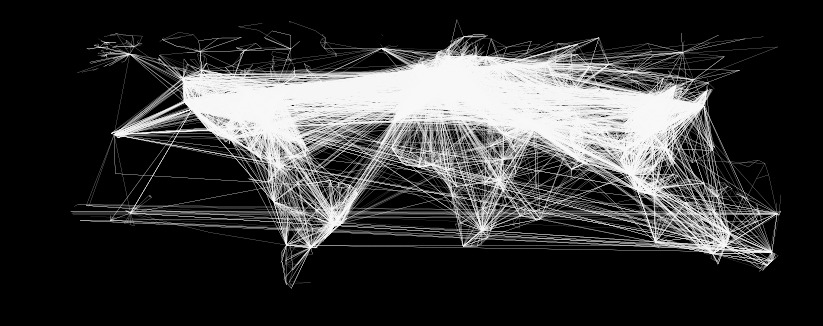

In [7]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(14, 7)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

plt.show()

In [ ]:

fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(14, 7)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

plt.show()